## Galleria Data Warehouse Part 2: Understanding the Data

This documents contains an initial assessment of the data presented by Galleria fast food chain and obtaining a complete understanding of what is in the data in order to prepare for the creation of a data warehouse. Additionally, it briefly looks into the analytical questions asked which will recreated on PowerBI.

**Table of contents:**

1. Understanding and cleaning the data
2. OLAP Schema Plan
3. Exploratory Data Analysis

### 1. Understanding and cleaning the data

In this section, the data will be carefully analysed to see the data quality e.g. whether it is clean, has missing values, etc, which will be cleaned. Additionally, the each column will be looked at carefully to see the type of values present and its data types.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# use a tab delimiter to split the data
df = pd.read_csv('Galleria.csv', delimiter='\t')

A tab delimiter was used to split the data to each column as the data was originally a text file with a lot of tabs and spaces.

In [3]:
df.head()

,SaleDate,TicketNo,Outlet,Total,OrderQty,Stock_Code,Name,Description,Price,Product_Group,Group_name,CardType
0,2018-08-21,92208,Birmingham,5.0,1,BK0101,Eggs Florentine,NaN,5.0,B,Breakfast,Visa
1,2018-08-21,92209,Birmingham,7.5,1,CP0125,The Sicilian Crepe,"Tuna, black olives, cheddar cheese, spinach an...",7.5,C,Crepes and Galettes,Avis
2,2018-08-21,92211,Middlesborough,7.5,1,CP0170,Crepe Japonnais,"Teriyaky Salmon & Shitake Mushrooms, with salad",7.5,C,Crepes and Galettes,Visa
3,2018-08-21,92217,Birmingham,5.0,1,BK0101,Eggs Florentine,NaN,5.0,B,Breakfast,Avis
4,2018-08-21,92217,Birmingham,7.5,1,CP0125,The Sicilian Crepe,"Tuna, black olives, cheddar cheese, spinach an...",7.5,C,Crepes and Galettes,Avis


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40705 entries, 0 to 40704
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SaleDate       40705 non-null  object 
 1   TicketNo       40705 non-null  int64  
 2   Outlet         40705 non-null  object 
 3   Total          40705 non-null  float64
 4   OrderQty       40705 non-null  int64  
 5   Stock_Code     40705 non-null  object 
 6   Name           40705 non-null  object 
 7   Description    29754 non-null  object 
 8   Price          40705 non-null  float64
 9   Product_Group  40705 non-null  object 
 10  Group_name     40705 non-null  object 
 11  CardType       40705 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 3.7+ MB


In [5]:
# look at unique values each variable has
for col_name in df.columns:
    print(col_name, end=': ')
    print(df[col_name].value_counts().count())

SaleDate: 1123
TicketNo: 16708
Outlet: 10
Total: 204
OrderQty: 28
Stock_Code: 78
Name: 77
Description: 64
Price: 28
Product_Group: 9
Group_name: 9
CardType: 4


In [6]:
df.isnull().sum()

SaleDate             0
TicketNo             0
Outlet               0
Total                0
OrderQty             0
Stock_Code           0
Name                 0
Description      10951
Price                0
Product_Group        0
Group_name           0
CardType             0
dtype: int64

The NaN values for description is not an issue as it is just additional data explaining what the item is

In [7]:
df.iloc[11]

SaleDate                                        2018-08-21
TicketNo                                             92235
Outlet                                      Middlesborough
Total                                                  9.5
OrderQty                                                 1
Stock_Code                                          PZ0005
Name                                           CAPRICCIOSA
Description      Tomato base, Mozzarella, ham & mushrooms 
Price                                                  9.5
Product_Group                                         P   
Group_name                                           Pizza
CardType                                        Debit Card
Name: 11, dtype: object

In [8]:
df.iloc[15]

SaleDate                                              2018-08-22
TicketNo                                                   92247
Outlet                                              Peterborough
Total                                                        7.5
OrderQty                                                       1
Stock_Code                                                CP0170
Name                                             Crepe Japonnais
Description      Teriyaky Salmon & Shitake Mushrooms, with salad
Price                                                        7.5
Product_Group                                                  C
Group_name                                   Crepes and Galettes
CardType                                              Debit Card
Name: 15, dtype: object

In [9]:
df['Description'].iloc[15]

'Teriyaky Salmon & Shitake Mushrooms, with salad'

In [10]:
df['Description'].iloc[13]

nan

In [11]:
df['Description'].iloc[0]

nan

In [12]:
df['Description'].iloc[11]

'Tomato base, Mozzarella, ham & mushrooms '

In [13]:
df['Product_Group'].iloc[11]

'P   '

There are a lot of cells with extra white space that needs to be removed and potentially find cells which may just be spaces and no actual data

In [14]:
df.dtypes

SaleDate          object
TicketNo           int64
Outlet            object
Total            float64
OrderQty           int64
Stock_Code        object
Name              object
Description       object
Price            float64
Product_Group     object
Group_name        object
CardType          object
dtype: object

Look at object columns for whitespace as floats and integers cannot take spaces

In [15]:
for col_name in df:
    try:
        unique_vals = np.unique(df[col_name])
        nr_vals = len(unique_vals)
    except:
        unique_vals = np.unique(df[col_name].astype(str))
        nr_vals = len(unique_vals)
    
    print(f"Unique values in column '{col_name}': {nr_vals}")
    print(unique_vals, end='\n\n')

Unique values in column 'SaleDate': 1123
['2016-07-01' '2016-07-02' '2016-07-03' ... '2019-07-29' '2019-07-30'
 '2019-07-31']

Unique values in column 'TicketNo': 16708
[ 82191  82192  82193 ... 114778 114780 114781]

Unique values in column 'Outlet': 10
['Birmingham' 'Cardiff' 'Edinburgh' 'Ipswich' 'London' 'Middlesborough'
 'Peterborough' 'Poole' 'Weymouth' 'Worthing']

Unique values in column 'Total': 204
[  3.     3.25   3.5    3.75   4.     4.5    5.     5.5    5.75   6.
   6.5    6.75   7.     7.5    8.     8.5    9.     9.5    9.75  10.
  10.5   11.    11.25  11.5   11.75  12.    12.5   13.    13.5   14.
  14.5   15.    16.    16.25  16.5   17.    17.25  17.5   18.    18.75
  19.    19.5   20.    20.25  21.    22.    22.5   22.75  23.    23.5
  24.    24.5   25.    25.5   26.    26.25  27.    27.5   28.    28.5
  28.75  29.    29.25  30.    31.5   32.    32.5   33.    33.75  34.
  34.5   35.    35.25  35.75  36.    37.5   38.    38.5   39.    40.
  40.25  40.5   41.25  42.    42

Strip the white space of each column:

In [16]:
# goes through each column and strips whitespaces
for col_name in df.columns:
    if df[col_name].dtypes == object:
        df[col_name] = df[col_name].str.strip()
    else:
        pass

Look at sample data to see if it was successful

In [17]:
np.unique(df['Product_Group'])

array(['A', 'B', 'C', 'D', 'F', 'G', 'K', 'P', 'S'], dtype=object)

Looks to have worked correctly

In [18]:
df.duplicated().sum()

0

There seems to be no duplicates

In [19]:
df[['TicketNo']].duplicated().sum()

23997

In [20]:
df[df['TicketNo'] == 92217]

,SaleDate,TicketNo,Outlet,Total,OrderQty,Stock_Code,Name,Description,Price,Product_Group,Group_name,CardType
3,2018-08-21,92217,Birmingham,5.0,1,BK0101,Eggs Florentine,NaN,5.0,B,Breakfast,Avis
4,2018-08-21,92217,Birmingham,7.5,1,CP0125,The Sicilian Crepe,"Tuna, black olives, cheddar cheese, spinach an...",7.5,C,Crepes and Galettes,Avis


One ticket number shows the different items bought for that particular ticket/person, but not a duplicate

In [21]:
df.tail()

,SaleDate,TicketNo,Outlet,Total,OrderQty,Stock_Code,Name,Description,Price,Product_Group,Group_name,CardType
40700,2018-08-20,92190,Birmingham,5.0,1,BK0101,Eggs Florentine,NaN,5.0,B,Breakfast,Avis
40701,2018-08-20,92191,Birmingham,5.0,1,BK0101,Eggs Florentine,NaN,5.0,B,Breakfast,Maestercard
40702,2018-08-20,92194,Weymouth,5.0,1,BK0110,Belgian waffle,NaN,5.0,B,Breakfast,Debit Card
40703,2018-08-21,92196,Middlesborough,7.5,1,CP0170,Crepe Japonnais,"Teriyaky Salmon & Shitake Mushrooms, with salad",7.5,C,Crepes and Galettes,Visa
40704,2018-08-21,92202,Peterborough,5.0,1,BK0110,Belgian waffle,NaN,5.0,B,Breakfast,Debit Card


Now that the data has been cleaned, it can be exported to csv

In [22]:
df.to_csv('Cleaned_Galleria.csv')

***Note:*** The data is cleaned in a way such that it is reproducible if any new data was to be inserted into this dataset. Currently the dataset has 40,705 which is not a lot of data and hence python would be able to handle the initial stage of cleaning. For future proof, if new rows are being inserted, let the quantity be such that python can handle it i.e. if data is too large, load it in batches or insert data more frequently OR simply insert records into the data correctly. This initial stage of cleaning is to produce a foundation for the Galleria operations, whereby this dataset can be imported to SQL by connecting to the db/data warehouse. However, this task was more so to understand the type of data which will be further explored in the following section.

### 2. OLAP Schema Plan

#### 2.1 Looking at Data

This section consists of looking at the data and seeing how the data can be split to create a STAR OLAP schema.

In [23]:
df.head(2)

,SaleDate,TicketNo,Outlet,Total,OrderQty,Stock_Code,Name,Description,Price,Product_Group,Group_name,CardType
0,2018-08-21,92208,Birmingham,5.0,1,BK0101,Eggs Florentine,NaN,5.0,B,Breakfast,Visa
1,2018-08-21,92209,Birmingham,7.5,1,CP0125,The Sicilian Crepe,"Tuna, black olives, cheddar cheese, spinach an...",7.5,C,Crepes and Galettes,Avis


In [24]:
np.unique(df[['Stock_Code']].values)

array(['APP001', 'APP002', 'BK0101', 'BK0102', 'BK0103', 'BK0110',
       'BK0160', 'BK0161', 'BK0162', 'CP0101', 'CP0102', 'CP0105',
       'CP0107', 'CP0108', 'CP0110', 'CP0111', 'CP0112', 'CP0113',
       'CP0117', 'CP0118', 'CP0119', 'CP0125', 'CP0134', 'CP0137',
       'CP0151', 'CP0156', 'CP0157', 'CP0158', 'CP0159', 'CP0160',
       'CP0163', 'CP0170', 'CP0256', 'DAB001', 'DAB002', 'DAB003',
       'DAB004', 'DAB005', 'DAB006', 'DAB007', 'DAB008', 'DAB009',
       'DAB010', 'DAB011', 'DAB012', 'DAB013', 'ENT0115', 'ENT0116',
       'ENT120', 'ENT121', 'ICE002', 'ICE004', 'PZ0001', 'PZ0002',
       'PZ0003', 'PZ0004', 'PZ0005', 'PZ0006', 'PZ0007', 'PZ0008',
       'PZ0009', 'PZ0010', 'PZ0011', 'PZ0012', 'PZ0013', 'PZ0014',
       'PZ0015', 'PZ0016', 'PZ0017', 'PZ0018', 'PZ0019', 'PZ0020',
       'PZ0021', 'SAL100', 'SAL102', 'SAL103', 'SD0001', 'SUP121'],
      dtype=object)

In [25]:
df[df['Stock_Code'] == 'PZ0021'].head(3)

,SaleDate,TicketNo,Outlet,Total,OrderQty,Stock_Code,Name,Description,Price,Product_Group,Group_name,CardType
87,2018-08-25,92399,Ipswich,10.0,1,PZ0021,THE DON,"(Folded pizza) Tomato base, mushrooms, red oni...",10.0,P,Pizza,Maestercard
160,2018-08-28,92569,Poole,10.0,1,PZ0021,THE DON,"(Folded pizza) Tomato base, mushrooms, red oni...",10.0,P,Pizza,Debit Card
216,2018-08-30,92667,Peterborough,10.0,1,PZ0021,THE DON,"(Folded pizza) Tomato base, mushrooms, red oni...",10.0,P,Pizza,Debit Card


- Stock Code can be used to identify which product is being sold i.e. the name of the product so it can be used in a new table. Alongside this, the description and price can be linked.

- The product group can be used to identify which group the product lies in and can be linked with the group name.

- The outlet can have its own table as it is just a city. Likewise, the card type can be split in the same manner.

#### 2.2 Plan of schema

Plan of STAR schema to be implemented as it is simpler and better to use for PowerBI than the snowflake schema. As there are no unique IDs in this table other than stock code (used to identify the item being sold), a primary ID must be created with multiple foreign IDs as follows:

Fact Table: 
- [SaleID, SaleDate, TicketNo, Stock_Code, OutletID, CardID, GroupID, OrderQty, Total] --> SalesID is primary key

Dimension Tables: 
-    - [GroupID, Product_Group, Group_name]
    - [StockCode, Name, Description, Price]
    - [OutletID, Outlet]
    - [CardID, CardType]

The new ID columns can be created and added to the dataset for when creating the schema as follows:

In [25]:
df.tail()

,SaleDate,TicketNo,Outlet,Total,OrderQty,Stock_Code,Name,Description,Price,Product_Group,Group_name,CardType
40700,2018-08-20,92190,Birmingham,5.0,1,BK0101,Eggs Florentine,NaN,5.0,B,Breakfast,Avis
40701,2018-08-20,92191,Birmingham,5.0,1,BK0101,Eggs Florentine,NaN,5.0,B,Breakfast,Maestercard
40702,2018-08-20,92194,Weymouth,5.0,1,BK0110,Belgian waffle,NaN,5.0,B,Breakfast,Debit Card
40703,2018-08-21,92196,Middlesborough,7.5,1,CP0170,Crepe Japonnais,"Teriyaky Salmon & Shitake Mushrooms, with salad",7.5,C,Crepes and Galettes,Visa
40704,2018-08-21,92202,Peterborough,5.0,1,BK0110,Belgian waffle,NaN,5.0,B,Breakfast,Debit Card


In [26]:
df.rename(columns={"Stock_Code": "StockCode", "Product_Group": "ProductGroup", "Group_name":"GroupName"}, inplace=True)

The dataset can then be imported to SQL database as follows:

In [27]:
import pyodbc
from sqlalchemy import create_engine
import urllib

SERVER_NAME = 'DESKTOP-GR6T3L7'
DATABASE_NAME = 'Galleria'

# connection string
conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server}; \
                       SERVER=' + SERVER_NAME + '; \
                       DATABASE=' + DATABASE_NAME + '; \
                       Trusted_Connection=yes')

# cursor to extract data
cursor = conn.cursor()

# Use this to connect for saving data
quoted = urllib.parse.quote_plus('DRIVER={ODBC Driver 17 for SQL Server}; \
                       SERVER='+SERVER_NAME+'; \
                       DATABASE='+DATABASE_NAME+'; \
                       Trusted_Connection=yes')

# save the dataset into SQL database
engine = create_engine('mssql+pyodbc:///?odbc_connect={}'.format(quoted))
df.to_sql('initial_dataset', schema='dbo', con=engine, if_exists='replace')

# close port
cursor.close()
conn.close( 
)
print('Dataset appended.')

Dataset appended.


Verification with SQL database to ensure schema splitting is correct:

In [28]:
df[(df['TicketNo'] == 92257)]

,SaleDate,TicketNo,Outlet,Total,OrderQty,StockCode,Name,Description,Price,ProductGroup,GroupName,CardType
19,2018-08-22,92257,Poole,7.5,1,CP0125,The Sicilian Crepe,"Tuna, black olives, cheddar cheese, spinach an...",7.5,C,Crepes and Galettes,Avis


In [29]:
df[(df['TicketNo'] == 92211)]

,SaleDate,TicketNo,Outlet,Total,OrderQty,StockCode,Name,Description,Price,ProductGroup,GroupName,CardType
2,2018-08-21,92211,Middlesborough,7.5,1,CP0170,Crepe Japonnais,"Teriyaky Salmon & Shitake Mushrooms, with salad",7.5,C,Crepes and Galettes,Visa


In [30]:
df[(df['StockCode'] == 'PZ0019') & (df['TicketNo'] == 92785)]

,SaleDate,TicketNo,Outlet,Total,OrderQty,StockCode,Name,Description,Price,ProductGroup,GroupName,CardType
318,2018-09-01,92785,Poole,10.0,1,PZ0019,MOO-MOO,"Tomato base, Mozzarella, chorizo & Gorgonzola",10.0,P,Pizza,Avis


### 3. Exploratory data analysis

This section consists of looking at each variable and how they relate to each other and trying to identify relationships and trends as well as looking at the distribution of the data.



In [32]:
data = pd.read_csv('Cleaned_Galleria.csv')

In [33]:
data.columns

Index(['Unnamed: 0', 'SaleDate', 'TicketNo', 'Outlet', 'Total', 'OrderQty',
       'Stock_Code', 'Name', 'Description', 'Price', 'Product_Group',
       'Group_name', 'CardType'],
      dtype='object')

In [34]:
del data['Unnamed: 0']

#### 3.1 Numerical Data

In [35]:
data.describe()

,TicketNo,Total,OrderQty,Price
count,40705.000000,40705.000000,40705.000000,40705.000000
mean,92232.059526,18.237716,2.462769,7.590910
std,9052.340917,18.114654,2.391667,2.608612
min,82191.000000,3.000000,1.000000,3.000000
25%,85270.000000,7.500000,1.000000,5.000000
50%,88650.000000,10.000000,1.000000,7.500000
75%,98323.000000,22.500000,3.000000,9.500000
max,114781.000000,216.000000,32.000000,16.000000


Notes:
- The most important variable for a business is to maximise profits and by looking at the variable $total$, we can understand how it varies.
- The order quantity ranges from 1 to 32 for one ticket but the mean is around 2.5 orders per item.
- The mean spent from one ticket is around £18, the minimum is £3 and the maximum is £216, where the £216 could be an anomaly.
- The mean price is around £7.50, the minimum is £2.60 and the maximum is £16.00 which which means is roughly the in between the min and max.

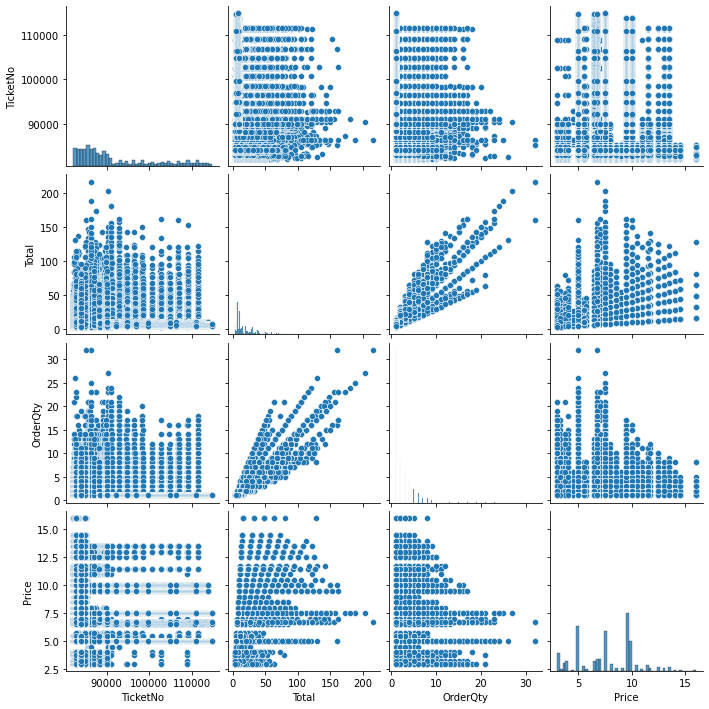

In [36]:
sns.pairplot(data)
plt.show()

Notes:
- Order quantity is lower for higher prices and generally a higher order quantity is positively correlated with the total amount spent.

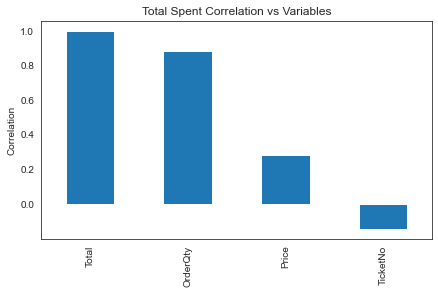

In [37]:
total_correlation = data.corr()['Total'].sort_values(ascending=False)

with sns.axes_style("white"):
    plt.figure(figsize=(7,4))
    total_correlation.plot.bar()
    plt.ylabel('Correlation')
    plt.title('Total Spent Correlation vs Variables')
    plt.show()

#### 3.2 Categorical Data

In [38]:
data.columns

Index(['SaleDate', 'TicketNo', 'Outlet', 'Total', 'OrderQty', 'Stock_Code',
       'Name', 'Description', 'Price', 'Product_Group', 'Group_name',
       'CardType'],
      dtype='object')

In [39]:
from datetime import datetime

data['SaleDate'] = pd.to_datetime(data['SaleDate'])

Looking at how sales vary with month and year

In [40]:
data['SaleMonth'] = data['SaleDate'].dt.month

In [41]:
import calendar

data['SaleMonthAbbr'] = data['SaleMonth'].apply(lambda x: calendar.month_abbr[x])

In [42]:
by_month = data.groupby(['SaleMonth', 'SaleMonthAbbr']).agg({'Total': 'mean', 'OrderQty':'mean'})
by_month

,,Total,OrderQty
SaleMonth,SaleMonthAbbr,,
1,Jan,14.596248,2.000816
2,Feb,16.225779,2.203875
3,Mar,15.485018,2.091867
4,Apr,17.136807,2.353277
5,May,17.841837,2.401743
6,Jun,16.987483,2.284503
7,Jul,21.092904,2.870885
8,Aug,21.282662,2.864440
9,Sep,21.804009,2.890772


<AxesSubplot:xlabel='SaleMonthAbbr', ylabel='Total'>

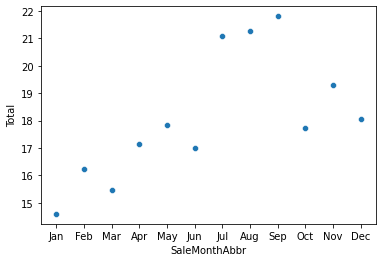

In [43]:
sns.scatterplot(x='SaleMonthAbbr', y='Total', data=by_month)

- Sales usually increase throughout the year but more significantly during the summer.

In [44]:
data['SaleYear'] = data['SaleDate'].dt.year

In [45]:
by_year = data.groupby('SaleYear').agg({'Total': 'mean', 'OrderQty':'mean'})
by_year

,Total,OrderQty
SaleYear,,
2016,16.814440,2.300020
2017,20.976292,2.860546
2018,19.200004,2.581745
2019,13.409238,1.770092


<AxesSubplot:xlabel='SaleYear', ylabel='Total'>

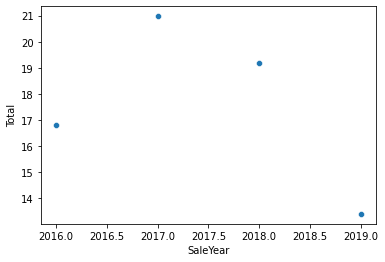

In [46]:
sns.scatterplot(x='SaleYear', y='Total', data=by_year)

- Sales started to decrease after 2017.

Looking at how sales vary with location

In [47]:
by_location = data.groupby('Outlet').agg({'Total': 'mean', 'OrderQty':'mean'}).reset_index().sort_values('Total', ascending=False)
by_location

,Outlet,Total,OrderQty
4,London,23.179106,3.148175
9,Worthing,22.743359,3.156114
1,Cardiff,21.952769,3.025335
2,Edinburgh,21.201490,2.896703
5,Middlesborough,18.801459,2.559357
0,Birmingham,18.801087,2.420227
7,Poole,16.694711,2.253094
3,Ipswich,14.910027,1.968265
8,Weymouth,11.464674,1.601449
6,Peterborough,8.971286,1.161548


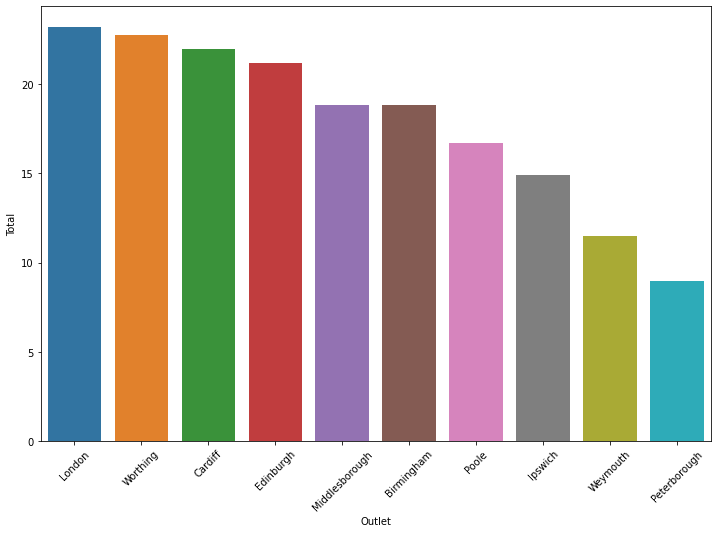

In [48]:
plt.figure(figsize=(12,8))
sns.barplot(x='Outlet', y='Total', data=by_location)
plt.xticks(rotation=45)
plt.show()

Looking at how sales vary with food category

In [49]:
by_product = data.groupby('Group_name').agg({'Total': 'mean', 'OrderQty':'mean'}).reset_index().sort_values('Total', ascending=False)
by_product

,Group_name,Total,OrderQty
8,Starters/Appetisers,31.323877,2.591017
4,Fish & Seafood,26.211165,1.849515
1,Crepes and Galettes,22.279510,2.811535
5,Pizza,21.965373,2.306699
6,Salads,21.357386,2.439773
2,Desserts,15.740754,1.856191
0,Breakfast,12.261673,2.326537
7,Side Dishes,11.924409,2.981102
3,Drinks & Beverages,10.997214,2.770734


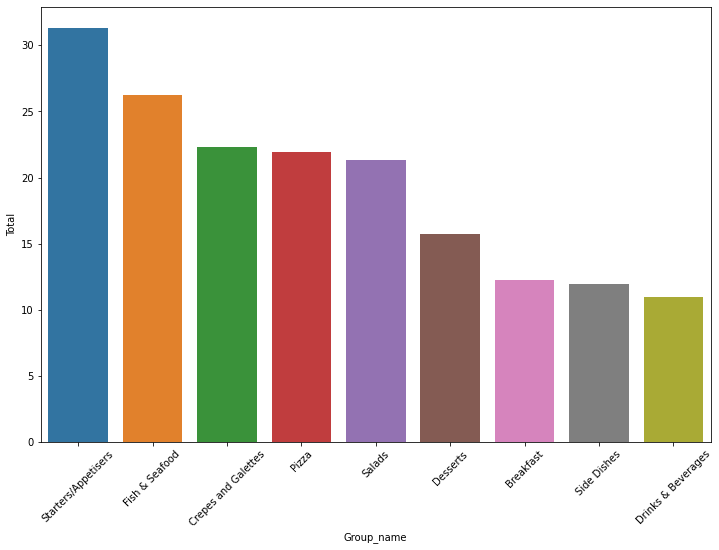

In [50]:
plt.figure(figsize=(12,8))
sns.barplot(x='Group_name', y='Total', data=by_product)
plt.xticks(rotation=45)
plt.show()

This section provided a brief look into the data and how the total sales is affected by other variables.

#### 3.3 Report Analysis Requirement

A) Most popular menu items and those which produce the most revenue

In [51]:
df.columns

Index(['SaleDate', 'TicketNo', 'Outlet', 'Total', 'OrderQty', 'StockCode',
       'Name', 'Description', 'Price', 'ProductGroup', 'GroupName', 'CardType',
       'OutletID', 'CardTypeID', 'ProductID', 'NameID'],
      dtype='object')

Most popular items:

In [52]:
df.groupby(['Name', 'StockCode']).agg({'OrderQty':'sum', 'Total':'sum'}).sort_values('OrderQty', ascending=False).head(10)

,,OrderQty,Total
Name,StockCode,,
Crepe Japonnais,CP0170,8212,61590.0
Belgian waffle,BK0110,6636,33180.0
Tartiflette Galette,CP0137,6548,44199.0
Eggs Florentine,BK0101,6434,32170.0
Italian crepe,CP0134,3603,27022.5
Chicken and Vegetable crepe,CP0256,2958,19227.0
POPAY,PZ0008,2947,27996.5
CALZONE,PZ0009,2623,26230.0
CAPRICCIOSA,PZ0005,2361,22429.5


Items with most revenue:

In [53]:
df.groupby(['Name', 'StockCode']).agg({'OrderQty':'sum', 'Total':'sum', 'Price':'mean'}).sort_values('Total', ascending=False).head(10)

,,OrderQty,Total,Price
Name,StockCode,,,
Crepe Japonnais,CP0170,8212,61590.0,7.50
Tartiflette Galette,CP0137,6548,44199.0,6.75
Belgian waffle,BK0110,6636,33180.0,5.00
Eggs Florentine,BK0101,6434,32170.0,5.00
POPAY,PZ0008,2947,27996.5,9.50
Italian crepe,CP0134,3603,27022.5,7.50
CALZONE,PZ0009,2623,26230.0,10.00
CAPRICCIOSA,PZ0005,2361,22429.5,9.50
MARCO'S,PZ0006,2205,20947.5,9.50


B) Most popular product groups and those which provide the most revenue

Most popular product groups:

In [54]:
df.groupby(['ProductGroup', 'GroupName']).agg({'OrderQty':'sum', 'Total':'sum'}).sort_values('OrderQty', ascending=False).head(10)

,,OrderQty,Total
ProductGroup,GroupName,,
C,Crepes and Galettes,28225,223664.00
P,Pizza,27512,261981.00
B,Breakfast,15746,82987.00
G,Drinks & Beverages,15167,60198.75
D,Desserts,8080,68519.50
S,Salads,2147,18794.50
K,Side Dishes,1893,7572.00
A,Starters/Appetisers,1096,13250.00
F,Fish & Seafood,381,5399.50


Product group which provides the most revenue:

In [55]:
df.groupby(['ProductGroup', 'GroupName']).agg({'OrderQty':'sum', 'Total':'sum', 'Price':'mean'}).sort_values('Total', ascending=False).head(10)

,,OrderQty,Total,Price
ProductGroup,GroupName,,,
P,Pizza,27512,261981.00,9.558607
C,Crepes and Galettes,28225,223664.00,8.124639
B,Breakfast,15746,82987.00,5.259752
D,Desserts,8080,68519.50,8.662991
G,Drinks & Beverages,15167,60198.75,4.029549
S,Salads,2147,18794.50,8.545455
A,Starters/Appetisers,1096,13250.00,11.989362
K,Side Dishes,1893,7572.00,4.000000
F,Fish & Seafood,381,5399.50,14.184466


C) League table with total weekly and monthly sales of various outlets

In [56]:
df.columns

Index(['SaleDate', 'TicketNo', 'Outlet', 'Total', 'OrderQty', 'StockCode',
       'Name', 'Description', 'Price', 'ProductGroup', 'GroupName', 'CardType',
       'OutletID', 'CardTypeID', 'ProductID', 'NameID'],
      dtype='object')

In [57]:
df['SaleDate'] = pd.to_datetime(df['SaleDate'])
df['SaleMonth'] = df['SaleDate'].dt.month
df['SaleMonthAbbr'] = df['SaleMonth'].apply(lambda x: calendar.month_abbr[x])

In [58]:
# splitting date weekly
df['WeekNumber'] = df['SaleDate'].dt.isocalendar().week

In [59]:
df.groupby(['WeekNumber', 'Outlet']).agg({'OrderQty':'sum', 'Total':'sum'}).sort_values(['WeekNumber', 'Total'], ascending=[True,False]).head(50)

OrderQty     Total
WeekNumber Outlet                            
1          Middlesborough       658   4590.75
           Edinburgh            583   4490.00
           Birmingham           379   3079.50
           Worthing             350   2713.00
           Cardiff              271   2042.50
           London               328   2016.50
           Ipswich              206   1402.25
           Poole                138   1020.00
           Weymouth             115    823.50
           Peterborough          86    685.00
2          Peterborough          71    564.50
           Middlesborough        57    418.25
           Birmingham            46    345.00
           Ipswich               37    296.25
           Poole                 31    231.50
           Edinburgh             25    186.00
           Weymouth              16    130.00
3          Peterborough          91    755.00
           Middlesborough        47    344.50
           Birmingham            42    307.50
           Ipswich               39    282.25
           Weymouth              30    197.75
           Edinburgh             28    190.50
           Poole                 18    147.00
4          Peterborough          78    604.50
           Birmingham            40    307.75
           Middlesborough        42    303.25
           Weymouth              28    209.00
           Ipswich               27    201.75
           Poole                 23    169.25
           Edinburgh             23    153.75
5          Middlesborough      1562  11175.25
           Birmingham          1135   8913.50
           Edinburgh           1238   8624.75
           Cardiff              693   4892.25
           Worthing             676   4810.00
           London               600   4574.00
           Poole                467   3680.00
           Ipswich              248   1893.50
           Weymouth             148   1021.00
           Peterborough          96    750.00
6          Peterborough          80    647.00
           Middlesborough        54    403.00
           Birmingham            50    345.50
           Ipswich               44    333.50
           Edinburgh             40    309.50
           Poole                 30    209.25
           Weymouth              24    181.00
7          Peterborough          91    717.50
           Birmingham            39    296.25

In [60]:
np.unique(df['Outlet'])

array(['Birmingham', 'Cardiff', 'Edinburgh', 'Ipswich', 'London',
       'Middlesborough', 'Peterborough', 'Poole', 'Weymouth', 'Worthing'],
      dtype=object)

In [61]:
df[(df['Outlet'] == 'London') & df['WeekNumber'] == 2]

,SaleDate,TicketNo,Outlet,Total,OrderQty,StockCode,Name,Description,Price,ProductGroup,GroupName,CardType,OutletID,CardTypeID,ProductID,NameID,SaleMonth,SaleMonthAbbr,WeekNumber


In [62]:
df.groupby(['SaleMonth', 'SaleMonthAbbr', 'Outlet']).agg({'OrderQty':'sum', 'Total':'sum'}).sort_values(['SaleMonth', 'Total'], ascending=[True,False]).head(50)

OrderQty     Total
SaleMonth SaleMonthAbbr Outlet                            
1         Jan           Middlesborough      1010   7029.75
                        Edinburgh            902   6637.00
                        Birmingham           630   4955.25
                        Worthing             432   3294.50
                        Cardiff              443   3285.00
                        Peterborough         357   2847.75
                        London               387   2381.50
                        Ipswich              323   2279.75
                        Poole                216   1598.75
                        Weymouth             206   1480.75
2         Feb           Middlesborough      1726  12356.75
                        Birmingham          1252   9734.50
                        Edinburgh           1341   9430.25
                        Cardiff              694   4899.75
                        Worthing             677   4815.00
                        London               600   4574.00
                        Poole                552   4316.50
                        Peterborough         374   2930.25
                        Ipswich              369   2790.50
                        Weymouth             263   1932.50
3         Mar           Middlesborough      1648  12272.75
                        Edinburgh           1180   8952.50
                        Birmingham           658   4861.00
                        London               601   4434.50
                        Worthing             530   3546.50
                        Ipswich              430   3394.00
                        Peterborough         416   3234.25
                        Cardiff              405   2746.75
                        Poole                278   2017.25
                        Weymouth             207   1568.50
4         Apr           Edinburgh           1471  10728.75
                        Middlesborough      1408  10051.75
                        Birmingham           814   6156.25
                        Cardiff              693   5097.75
                        Worthing             621   4863.25
                        London               593   3926.25
                        Ipswich              426   2917.25
                        Peterborough         352   2728.25
                        Poole                345   2548.50
                        Weymouth             278   1964.00
5         May           Middlesborough      2422  18219.00
                        Edinburgh           1946  13572.25
                        Birmingham          1674  13061.25
                        London               836   6555.75
                        Cardiff              889   6493.75
                        Worthing             896   6354.00
                        Poole                704   5357.75
                        Ipswich              438   3212.25
                        Peterborough         364   2822.50
                        Weymouth             305   2159.75

D) Additional insights: What is the most popular item in each outlet

In [63]:
df.columns

Index(['SaleDate', 'TicketNo', 'Outlet', 'Total', 'OrderQty', 'StockCode',
       'Name', 'Description', 'Price', 'ProductGroup', 'GroupName', 'CardType',
       'OutletID', 'CardTypeID', 'ProductID', 'NameID', 'SaleMonth',
       'SaleMonthAbbr', 'WeekNumber'],
      dtype='object')

In [64]:
outlet_name = df.groupby(['Outlet', 'Name']).agg({'OrderQty':'sum', 'Total':'sum'}).sort_values(['Outlet', 'OrderQty'], ascending=[True, False])
outlet_name

OrderQty    Total
Outlet     Name                                             
Birmingham Crepe Japonnais                      879  6592.50
           Belgian waffle                       778  3890.00
           Eggs Florentine                      729  3645.00
           Tartiflette Galette                  663  4475.25
           POPAY                                534  5073.00
...                                             ...      ...
Worthing   Reveil Royal                           5    35.00
           Kir Normand                            4    28.00
           Bloody Mary                            3    24.00
           Asperges et Champignons Mornay         2    26.00
           Eggs Royale                            1     5.00

[690 rows x 2 columns]

In [65]:
outlet_name.groupby('Outlet').head(3)

OrderQty     Total
Outlet         Name                                   
Birmingham     Crepe Japonnais           879   6592.50
               Belgian waffle            778   3890.00
               Eggs Florentine           729   3645.00
Cardiff        Crepe Japonnais           514   3855.00
               Tartiflette Galette       513   3462.75
               Belgian waffle            414   2070.00
Edinburgh      Crepe Japonnais          1635  12262.50
               Tartiflette Galette      1433   9672.75
               Eggs Florentine          1277   6385.00
Ipswich        Crepe Japonnais           672   5040.00
               Belgian waffle            547   2735.00
               Eggs Florentine           547   2735.00
London         Crepe Japonnais           584   4380.00
               Tartiflette Galette       562   3793.50
               Belgian waffle            440   2200.00
Middlesborough Crepe Japonnais          1686  12645.00
               Tartiflette Galette      1443   9740.25
               Belgian waffle           1373   6865.00
Peterborough   Crepe Japonnais           603   4522.50
               Belgian waffle            527   2635.00
               Eggs Florentine           507   2535.00
Poole          Crepe Japonnais           576   4320.00
               Belgian waffle            510   2550.00
               Eggs Florentine           485   2425.00
Weymouth       Crepe Japonnais           549   4117.50
               Eggs Florentine           407   2035.00
               Belgian waffle            396   1980.00
Worthing       Tartiflette Galette       549   3705.75
               Crepe Japonnais           514   3855.00
               Latte                     509   1782.25

Verification with PowerBI numbers:

In [66]:
np.count_nonzero(np.unique(df['TicketNo']))

16708

In [67]:
np.count_nonzero(np.unique(df['SaleDate']))

1123

In [68]:
df['Total'].sum()

742366.25

In [70]:
df

,SaleDate,TicketNo,Outlet,Total,OrderQty,StockCode,Name,Description,Price,ProductGroup,GroupName,CardType,OutletID,CardTypeID,ProductID,NameID,SaleMonth,SaleMonthAbbr,WeekNumber
0,2018-08-21,92208,Birmingham,5.0,1,BK0101,Eggs Florentine,NaN,5.0,B,Breakfast,Visa,1,1,1,1,8,Aug,34
1,2018-08-21,92209,Birmingham,7.5,1,CP0125,The Sicilian Crepe,"Tuna, black olives, cheddar cheese, spinach an...",7.5,C,Crepes and Galettes,Avis,2,2,2,2,8,Aug,34
2,2018-08-21,92211,Middlesborough,7.5,1,CP0170,Crepe Japonnais,"Teriyaky Salmon & Shitake Mushrooms, with salad",7.5,C,Crepes and Galettes,Visa,3,3,3,3,8,Aug,34
3,2018-08-21,92217,Birmingham,5.0,1,BK0101,Eggs Florentine,NaN,5.0,B,Breakfast,Avis,4,4,4,4,8,Aug,34
4,2018-08-21,92217,Birmingham,7.5,1,CP0125,The Sicilian Crepe,"Tuna, black olives, cheddar cheese, spinach an...",7.5,C,Crepes and Galettes,Avis,5,5,5,5,8,Aug,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40700,2018-08-20,92190,Birmingham,5.0,1,BK0101,Eggs Florentine,NaN,5.0,B,Breakfast,Avis,40701,40701,40701,40701,8,Aug,34
40701,2018-08-20,92191,Birmingham,5.0,1,BK0101,Eggs Florentine,NaN,5.0,B,Breakfast,Maestercard,40702,40702,40702,40702,8,Aug,34
40702,2018-08-20,92194,Weymouth,5.0,1,BK0110,Belgian waffle,NaN,5.0,B,Breakfast,Debit Card,40703,40703,40703,40703,8,Aug,34
40703,2018-08-21,92196,Middlesborough,7.5,1,CP0170,Crepe Japonnais,"Teriyaky Salmon & Shitake Mushrooms, with salad",7.5,C,Crepes and Galettes,Visa,40704,40704,40704,40704,8,Aug,34


Looking at unique customers of each year:

In [91]:
np.unique(df[df['SaleDate'].dt.year == 2016]['TicketNo']).shape[0]

1334

In [88]:
np.unique(df[df['SaleDate'].dt.year == 2017]['TicketNo']).shape[0]

3279

In [89]:
np.unique(df[df['SaleDate'].dt.year == 2018]['TicketNo']).shape[0]

6269

In [92]:
np.unique(df[df['SaleDate'].dt.year == 2019]['TicketNo']).shape[0]

5826

Note: the count values match correctly on PowerBI i.e. summation of order quantity and the rest of the count values. However, the summation of revenue seems to be slightly off. Must be a PowerBI thing.

**END**